## FFT Filters

Quiero hacer un filtro para remover el segundo tono de una señal de 2 tonos.

Para esto, obtengo el espectro y filtramos en el dominio de la frecuencia, por ejemplo multiplicando los espectros.
En este caso solamente "borro" (fuerzo un valor) en determinados bins de la respuesta en frecuencia. No es necesario multiplicar pero se podría (es equivalente).

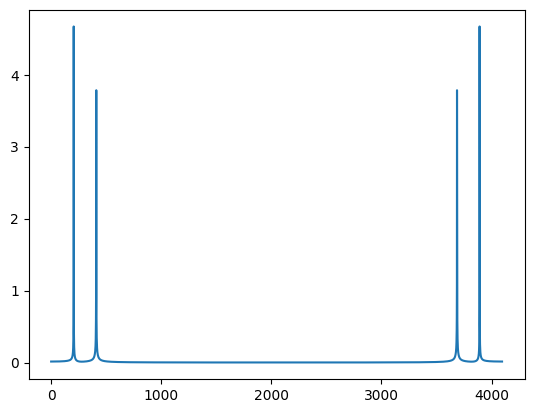

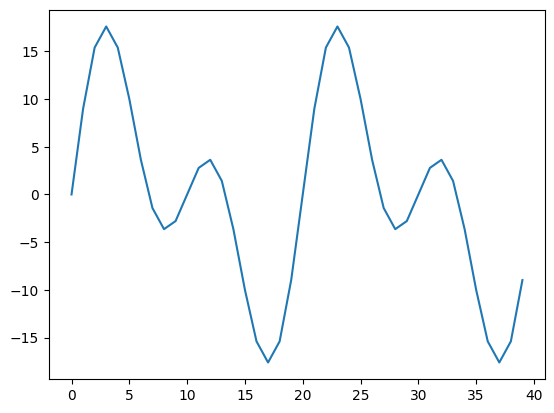

In [15]:
import scipy.signal as sig
import numpy as np
from scipy.fftpack import fft, ifft, fftshift, rfft, irfft
import matplotlib.pyplot as plt

def fft_filter(signal,*bin_to_delete, val=0):
    spec = (fft(signal))
    for i in bin_to_delete:
        spec[i] = val
        spec[len(spec)-i] = val
    return ifft(spec)

N = 1024*4
Fs = 20000
Fc1 = 1000
Fc2 = 2000
t = np.arange(0, N/Fs, 1/Fs)
x1 = 10* np.sin(2*np.pi*Fc1*t)
x2 = 10* np.sin(2*np.pi*Fc2*t)
s = x1+x2
plt.plot(abs(fft(s))/N)
plt.figure()
plt.plot(s[0:40])


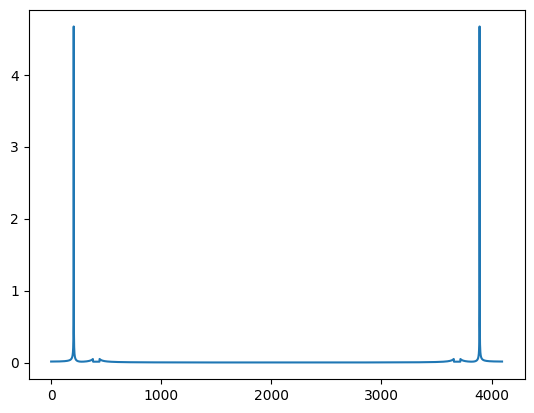

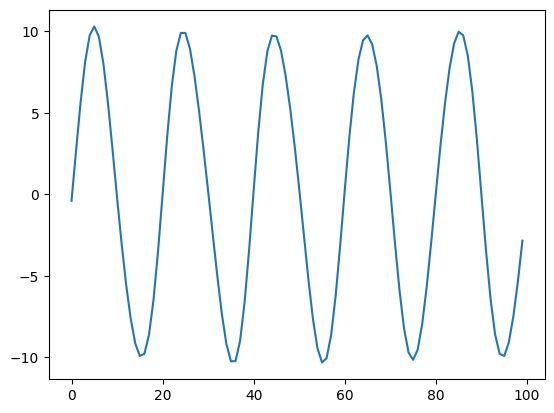

In [17]:
a = np.arange(190*2,220*2,1)
sf = fft_filter(s,a, val = 50)
plt.plot(abs(fft(sf))/N)
plt.figure()
plt.plot(sf[100:200])